In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#shared this folder, you have to make ur own folder and make ur own file paths
file_path = '/content/drive/MyDrive/CSV-397/Lebron.csv'

Below is Code for "Responsible Betting Component"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
              precision    recall  f1-score   support

           0       0.58      0.54      0.56        13
           1       0.40      0.44      0.42         9

    accuracy                           0.50        22
   macro avg       0.49      0.49      0.49        22
weighted avg       0.51      0.50      0.50        22

Accuracy: 0.5


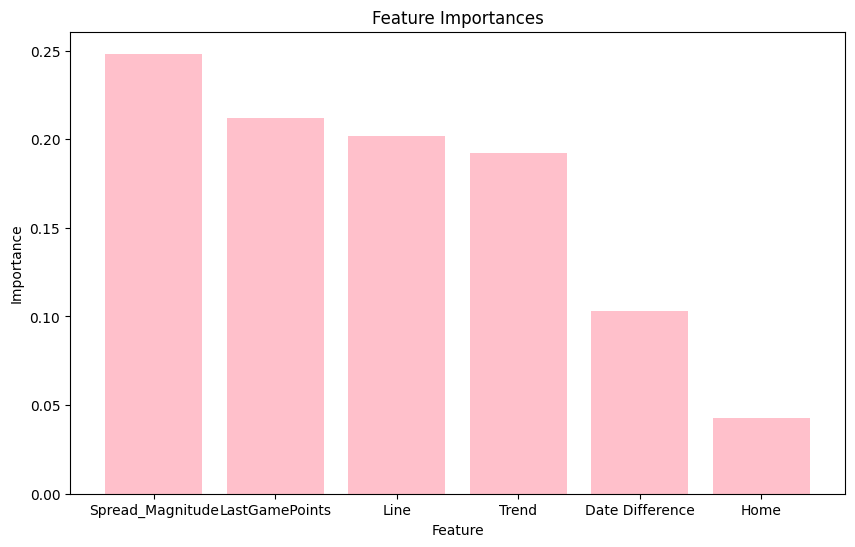

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import re
from datetime import date


from google.colab import drive
drive.mount('/content/drive')

#shared this folder, you have to make ur own folder and make ur own file paths
file_path = '/content/drive/My Drive/CSV-397/Lebron.csv'

# Load the dataset
df = pd.read_csv(file_path)
df['Home'] = np.where(df['Matchup'].str.startswith('@'), 0, 1)
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d')

# Define function to extract points and convert Line to numeric
def extract_points(points_str):
    match = re.search(r'\d+', points_str)
    return int(match.group()) if match else None


def extract_spread(gameline_str):
    matchteam = re.search(r'LAL',gameline_str)

    matchpoints = re.search(r'[+-]', gameline_str)
    if not matchteam or not matchpoints:
      return -1
    if matchpoints.group():
      return int(matchpoints.group())
    else:
      return int(matchpoints.group() * -1)
def is_lal_favorite(spread):
    if 'LAL' in spread:
        # Extract the sign and value
        sign = spread.split(' ')[1][0]
        return 1 if sign == '-' else 0
    else:
        # If LAL is not mentioned, they are the underdog if the sign is positive
        sign = spread.split(' ')[1][0]
        return 0 if sign == '-' else 1

# Function to extract the point spread magnitude
def spread_magnitude(spread):
    # Extract the numeric value
    value = spread.split(' ')[1]
    return abs(float(value))


# Apply the functions to create new columns
df['LAL_Status'] = df['Spread'].apply(is_lal_favorite)
df['Spread_Magnitude'] = df['Spread'].apply(spread_magnitude)
df['Spread_Magnitude'] = np.where(df['LAL_Status'] == 1,
                                  -df['Spread_Magnitude'],
                                  df['Spread_Magnitude'])


# Extracting the betting line as numeric, assuming df['Line'] exists and is formatted properly
df['Line'] = df['Line'].apply(lambda x: float(x) if isinstance(x, str) and x.replace('.', '', 1).isdigit() else np.nan)

# Extract necessary data
df['Points'] = df['Points'].apply(extract_points)

# Calculate rolling averages for the last 3 games
df['LastGamePoints'] = df['Points'].shift(1).rolling(window=1, min_periods=1).mean()

# Calculate the difference in days between rows
df['Date Difference'] = df['Date'].diff().dt.days.fillna(0)

# Create binary classification target based on Line
df['Over_Under'] = (df['Points'] > df['Line']).astype(int)

df['Overall'] = 0.6 * df['Spread_Magnitude'] + 0.4 * df['Home'] + 0.5 * df['Date Difference'] + 0.75 * df['Line'] + 0.6 * df['LastGamePoints'] + 0.3 * df['Def']


# Prepare the data for modeling
features = ['Home','Spread_Magnitude', 'Date Difference', 'Line', 'LastGamePoints', 'Trend']
target = 'Over_Under'
X = df[features].fillna(0)
y = df[target]

# Split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Use RandomForestClassifier instead of RandomForestRegressor
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy}')

# Visualization of Feature Importances
feature_importances = model.feature_importances_
features_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
features_df = features_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(features_df['Feature'], features_df['Importance'], color='pink')
plt.title('Feature Importances')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Mean Squared Error: 43.12892727272728


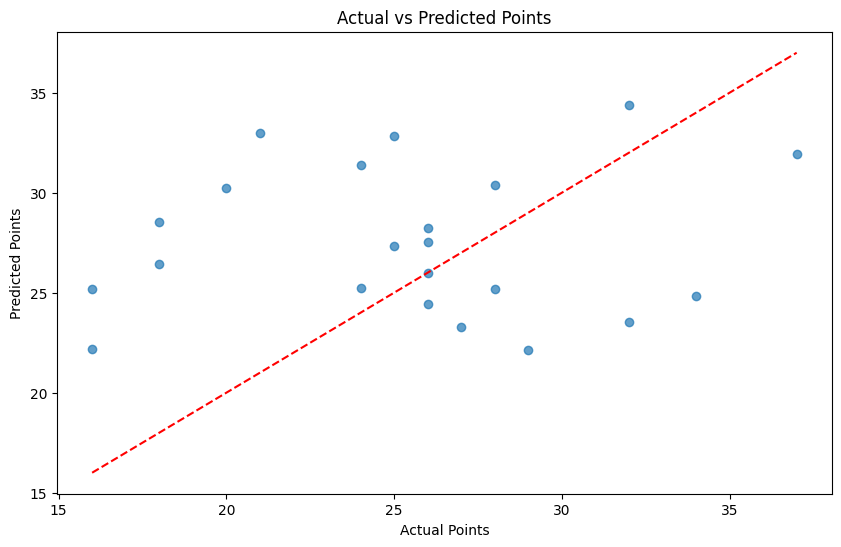

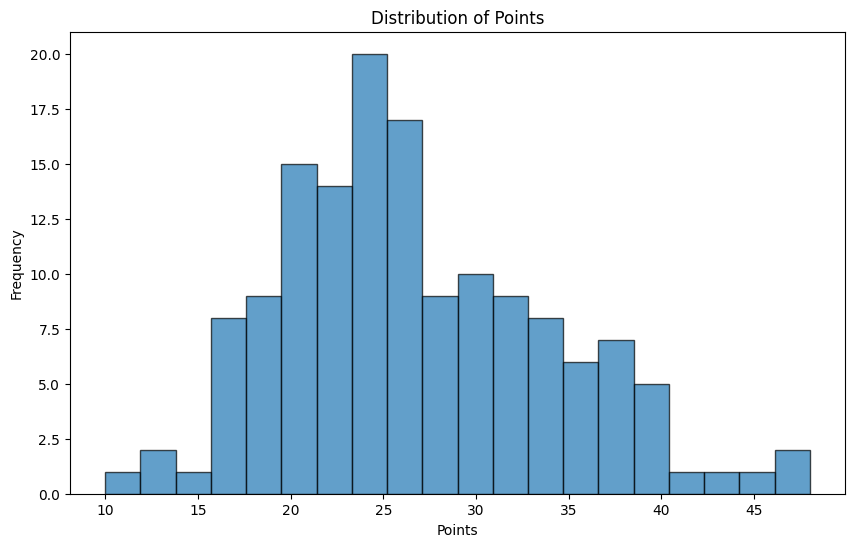

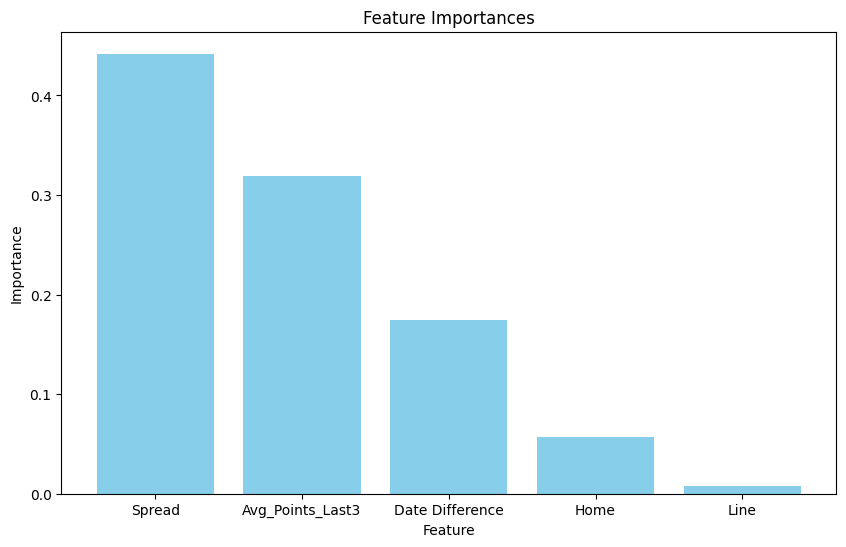

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# shared this folder, you have to make your own folder and make your own file paths
file_path = '/content/drive/My Drive/CSV-397/Lebron.csv'

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import re
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(file_path)
df['Home'] = np.where(df['Matchup'].str.startswith('@'), 0, 1)

# Define functions to extract data
def extract_points(points_str):
    match = re.search(r'\d+', points_str)
    return int(match.group()) if match else None
def extract_spread(gameline_str):

    match = re.search(r'([+-]?\d+\.?\d*)', gameline_str)
    return float(match.group()) if match else None


def extract_line(string):
  if string == 'NL':
    return 25.0

# Apply functions to extract necessary data
df['Line'] = df['Line'].apply(extract_line)
df['Spread'] = df['Spread'].apply(extract_spread)
df['Points'] = df['Points'].apply(extract_points)
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d')

df['Avg_Points_Last3'] = df['Points'].shift(1).rolling(window=1, min_periods=1).mean()
df['Avg_Rebounds_Last3'] = df['Rebounds'].shift(1).rolling(window=3, min_periods=1).mean()
df['Avg_Assists_Last3'] = df['Assists'].shift(1).rolling(window=3, min_periods=1).mean()


# Calculate the difference in days between rows
df['Date Difference'] = df['Date'].diff().dt.days.fillna(0)

# Prepare the data for modeling
features = ['Home', 'Spread', 'Line','Date Difference', 'Avg_Points_Last3']
target = 'Points'
X = df[features].fillna(0)
y = df[target].fillna(0)

# Split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate and print the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


# Visualization 2: Actual vs Predicted Points
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Points')
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.show()

# Visualization 1: Distribution of the Points
plt.figure(figsize=(10, 6))
plt.hist(df['Points'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of Points')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.show()


# Visualization 3: Feature Importances
feature_importances = model.feature_importances_
features_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
features_df = features_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(features_df['Feature'], features_df['Importance'], color='skyblue')
plt.title('Feature Importances')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
              precision    recall  f1-score   support

           0       0.75      0.67      0.71         9
           1       0.50      0.60      0.55         5

    accuracy                           0.64        14
   macro avg       0.62      0.63      0.63        14
weighted avg       0.66      0.64      0.65        14

Accuracy: 0.6428571428571429


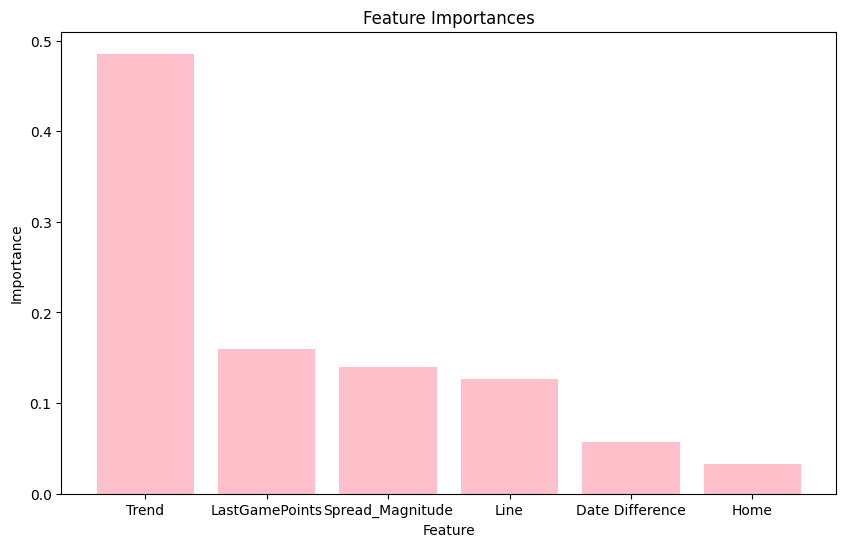

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import re


from google.colab import drive
drive.mount('/content/drive')

#shared this folder, you have to make ur own folder and make ur own file paths
file_path = '/content/drive/My Drive/CSV-397/Chet.csv'

# Load the dataset
df = pd.read_csv(file_path)
df['Home'] = np.where(df['Matchup'].str.startswith('@'), 0, 1)
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d')

# Define function to extract points and convert Line to numeric
def extract_points(points_str):
    match = re.search(r'\d+', points_str)
    return int(match.group()) if match else None


def extract_spread(gameline_str):
    matchteam = re.search(r'OKC',gameline_str)

    matchpoints = re.search(r'[+-]', gameline_str)
    if matchpoints.group():
      return int(matchpoints.group())
    else:
      return int(matchpoints.group() * -1)
def is_lal_favorite(spread):
    if 'OKC' in spread:
        # Extract the sign and value
        sign = spread.split(' ')[1][0]
        return 1 if sign == '-' else 0
    else:
        # If LAL is not mentioned, they are the underdog if the sign is positive
        sign = spread.split(' ')[1][0]
        return 0 if sign == '-' else 1

# Function to extract the point spread magnitude
def spread_magnitude(spread):
    # Extract the numeric value
    value = spread.split(' ')[1]
    return abs(float(value))


# Apply the functions to create new columns
df['LAL_Status'] = df['Spread'].apply(is_lal_favorite)
df['Spread_Magnitude'] = df['Spread'].apply(spread_magnitude)
df['Spread_Magnitude'] = np.where(df['LAL_Status'] == 1,
                                  -df['Spread_Magnitude'],
                                  df['Spread_Magnitude'])
def convert_line_to_float(line):
    try:
        # Attempt to strip any extraneous spaces and convert to float
        return float(str(line).strip())
    except ValueError:
        # Log the problematic value
        print(f"Cannot convert to float: {line}")
        return np.nan

# Apply this function to the 'Line' column
df['Line'] = df['Line'].apply(convert_line_to_float)


# Extract necessary data
df['Points'] = df['Points'].apply(extract_points)

# Calculate rolling averages for the last 3 games
df['LastGamePoints'] = df['Points'].shift(1).rolling(window=1, min_periods=1).mean()

# Calculate the difference in days between rows
df['Date Difference'] = df['Date'].diff().dt.days.fillna(0)

# Create binary classification target based on Line
df['Over_Under'] = (df['Points'] > df['Line']).astype(int)


# Prepare the data for modeling
features = ['Home','Spread_Magnitude', 'Date Difference', 'Line', 'LastGamePoints', 'Trend']
target = 'Over_Under'
X = df[features].fillna(0)
y = df[target]

# Split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=40)

# Use RandomForestClassifier instead of RandomForestRegressor
model = RandomForestClassifier(n_estimators=200, random_state=40)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy}')
# Visualization of Feature Importances
feature_importances = model.feature_importances_
features_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
features_df = features_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(features_df['Feature'], features_df['Importance'], color='pink')
plt.title('Feature Importances')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()
